In [11]:
import math
import PIL
import extcolors
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from matplotlib import gridspec
import pandas as pd

### Get color palette from an image

In [12]:
paintings= pd.read_csv("datasets/prado_oil.csv")

In [13]:
#don't run again
"""import os
for index, row in paintings.iterrows():
    os.system(f"curl {row['img_link']} > images/prado_paintings/{row['img_name']}")

os.system("say -v monica ayamdon")"""

'import os\nfor index, row in paintings.iterrows():\n    os.system(f"curl {row[\'img_link\']} > images/prado_paintings/{row[\'img_name\']}")\n\nos.system("say -v monica ayamdon")'

In [14]:
paintings.sample(5)

,title,subtitle,artist,img_link,year,img_name
1576,Saint Joseph with the Christ Child,Oil on canvas,"Martínez, Sebastián",https://content3.cdnprado.net/imagenes/Documen...,1650,e300423b-1c9d-461f-a4ba-309ccd08ce7a_268.jpg
1230,The Annunciation,Oil on canvas,"Turchi, Alessandro",https://content3.cdnprado.net/imagenes/Documen...,1635,8bc4b4eb-536d-4503-bd37-e2e46c384091_268.jpg
1004,The Meeting of Abraham and Melchizedek,Oil on panel,"Rubens, Peter Paul",https://content3.cdnprado.net/imagenes/Documen...,1625,e0d715af-36b5-4d55-b201-222e0f4b04a6_268.jpg
2042,"Louis of France, the Grand Dauphin",Oil on canvas,Anonymous,https://content3.cdnprado.net/imagenes/Documen...,1750,632a576c-6e7e-4543-af15-f9fcd6612667_268.jpg
1261,"Recognition of the Carthusian Saint , Cardinal...",Oil on canvas,"Carducho, Vicente",https://content3.cdnprado.net/imagenes/Documen...,1632,1121e9a4-5e86-48a0-a1d0-c37f6a64a9b5_268.jpg


In [15]:
# group of functions -> it will return my image + the color palette that's been used 
def study_image(img):
  im = Image.open(img)
  colors = extract_colors(img)
  color_palette = render_color_platte(colors)
  return overlay_palette(img, color_palette)

# function that extracts the color codes of the image - palette in codes
def extract_colors(img):
  im = Image.open(img)
  tolerance = 32
  limit = 24
  colors, pixel_count = extcolors.extract_from_image(im, tolerance, limit)
  #I remove white, as it is the margin of the picture
  for e in colors:
    if e[0] == (255, 255, 255):
      colors.remove(e)
  return colors


# this transforms color code into the color palette
def render_color_platte(colors):
  size = 100
  columns = 6
  width = int(min(len(colors), columns) * size)
  height = int((math.floor(len(colors) / columns) + 1) * size)
  result = Image.new("RGBA", (width, height), (0, 0, 0, 0))
  canvas = ImageDraw.Draw(result)
  for idx, color in enumerate(colors):
      x = int((idx % columns) * size)
      y = int(math.floor(idx / columns) * size)
      canvas.rectangle([(x, y), (x + size - 1, y + size - 1)], fill=color[0])
  return result


# groups image and color palette rectangle
def overlay_palette(img, color_palette):
  img = Image.open(img)
  nrow = 2
  ncol = 1
  f = plt.figure(figsize=(10,10), facecolor='None', edgecolor='k', dpi=55, num=None)
  gs = gridspec.GridSpec(nrow, ncol, wspace=0.0, hspace=0.0) 
  f.add_subplot(2, 1, 1)
  plt.imshow(img, interpolation='nearest')
  plt.axis('off')
  f.add_subplot(1, 2, 2)
  plt.imshow(color_palette, interpolation='nearest')
  plt.axis('off')
  plt.subplots_adjust(wspace=0, hspace=0, bottom=0)
  plt.show(block=True)




In [16]:
image = paintings["img_name"][:2]
for i in image:
    path = f"images/prado_paintings/{i}"
    print(extract_colors(path))


[((197, 192, 163), 42718), ((131, 43, 29), 24988), ((47, 18, 10), 2750), ((129, 102, 72), 1368)]
[((33, 32, 27), 31872), ((134, 52, 30), 21234), ((216, 188, 141), 12316), ((116, 96, 71), 1918), ((215, 67, 37), 900)]


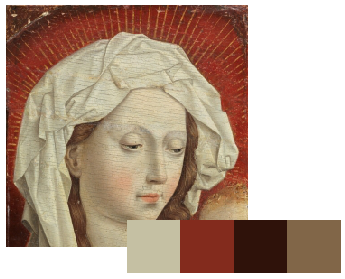

[((197, 192, 163), 42718), ((131, 43, 29), 24988), ((47, 18, 10), 2750), ((129, 102, 72), 1368)]


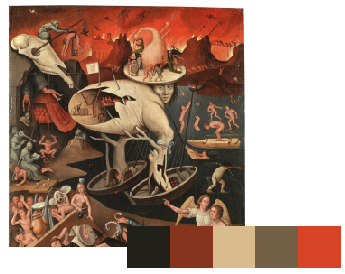

[((33, 32, 27), 31872), ((134, 52, 30), 21234), ((216, 188, 141), 12316), ((116, 96, 71), 1918), ((215, 67, 37), 900)]


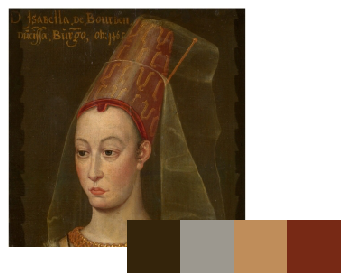

[((52, 36, 11), 59588), ((156, 152, 143), 7249), ((191, 141, 90), 2369), ((119, 41, 21), 223)]


In [17]:
image = paintings["img_name"][:3]
for e in image:
    path = f"images/prado_paintings/{e}"


    study_image(path)
    print(extract_colors(path))

In [18]:
paintings.sample(5)

,title,subtitle,artist,img_link,year,img_name
910,Saint John the Baptist in a Landscape,Oil on canvas,"Maíno, Fray Juan Bautista",https://content3.cdnprado.net/imagenes/Documen...,1614,8e838823-aece-40c8-b94b-2b40db16b620_268.jpg
1185,Noli me Tangere,Oil on canvas,"Núñez del Valle, Pedro",https://content3.cdnprado.net/imagenes/Documen...,1635,d281a225-8d22-4ff0-b904-a91645f925b8_268.jpg
1046,The Adoration of the Shepherds,Oil on panel,"Wtewael, Joachim",https://content3.cdnprado.net/imagenes/Documen...,1625,a16148aa-add4-490f-af40-c8b5c25cfd33_268.jpg
912,Saint Anthony Abbot in a Landscape,Oil on panel,"Maíno, Fray Juan Bautista",https://content3.cdnprado.net/imagenes/Documen...,1614,d0cdfcab-0e9c-4c46-8961-cda0b0e7cfb2_268.jpg
698,Concert of the Birds,Oil on canvas,"Snyders, Frans",https://content1.cdnprado.net/imagenes/Documen...,1600,b12d21e9-5fc6-4602-b0ce-24142ea9aa45_268.jpg


In [19]:
# estudi goya

goya = paintings[paintings['artist'].astype(str).str.contains('Goya', case=False)]

In [20]:
goya

,title,subtitle,artist,img_link,year,img_name
2325,Saint Barbara,Oil on canvas,"Goya y Lucientes, Francisco de",https://content3.cdnprado.net/imagenes/Documen...,1772,e8587d2d-86d8-4aa0-8499-95db4e02699f_268.jpg
2366,The Victorious Hannibal seeing Italy from the ...,Oil on canvas,"Goya y Lucientes, Francisco de",https://content3.cdnprado.net/imagenes/Documen...,1771,7edc8e0f-0440-4fbe-8f23-6e92c339814b_268.jpg
2403,Dogs on a Leash,Oil on canvas,"Goya y Lucientes, Francisco de",https://content3.cdnprado.net/imagenes/Documen...,1775,a456f5bb-6d42-46c7-af69-4fcf34427623_268.jpg
2404,A Hunter with his Hounds,Oil on canvas,"Goya y Lucientes, Francisco de",https://content3.cdnprado.net/imagenes/Documen...,1775,610d62fc-d6d7-4d96-af87-8b660332bf6d_268.jpg
2405,Decoy Hunting,Oil on canvas,"Goya y Lucientes, Francisco de",https://content3.cdnprado.net/imagenes/Documen...,1775,d6d45fae-8a73-4e91-90f4-d0e4bfa5e6b1_268.jpg
...,...,...,...,...,...,...
2708,Saints Justa and Rufina,Oil on cedar panel,"Goya y Lucientes, Francisco de",https://content3.cdnprado.net/imagenes/Documen...,1817,d2a0b5af-1778-4e81-a410-d8a8ea14b06c_268.jpg
2714,A Manola: Leocadia Zorilla,Oil on mural transferred to canvas,"Goya y Lucientes, Francisco de",https://content3.cdnprado.net/imagenes/Documen...,1823,e04801ae-5f63-4dd0-9986-425961c11b86_268.jpg
2715,"Witches' Sabbath, or the Great He-Goat",Oil on mural transferred to canvas,"Goya y Lucientes, Francisco de",https://content3.cdnprado.net/imagenes/Documen...,1823,3fe948c5-7b09-4700-9298-18f66085055e_268.jpg
2720,The Milkmaid of Bordeaux,Oil on canvas,"Goya y Lucientes, Francisco de",https://content3.cdnprado.net/imagenes/Documen...,1827,e1dc21e4-0b51-4558-be98-d5b29fe4e0cc_268.jpg


In [36]:
def get_palette_list (col_images):
    palettelist=[]
    for cuadro in col_images:
        try:
            path = f"images/prado_paintings/{cuadro}"

            #study_image(path)
            palettelist.append(extract_colors(path))
        except:
            palettelist.append([])
            pass
    return palettelist

    

In [22]:
goyapalette= get_palette_list(goya["img_name"])


In [23]:

def get_top3_colors(palettelist):
    all_color=[]
    for palette in palettelist:
        for color in palette:
            all_color.append(color)
    count1=0
    count2=0
    count3=0
    
    col1=()
    col2=()
    col3=()
    

    for c in all_color:
        curr_frequency = all_color.count(c)
        if curr_frequency> count1:
            count1 = curr_frequency
            col1 = c

        elif curr_frequency> count2:
            count2= curr_frequency
            col2=c

        elif curr_frequency> count3:
            count3= curr_frequency
            col3=c



    return [col1,col2,col3]       
        

In [24]:
main_color_goya = get_top3_colors(goyapalette)
main_color_goya

[((33, 28, 24), 48441), ((116, 82, 37), 8959), ((166, 171, 148), 1863)]

In [25]:
main_color_goya[0][0]

(33, 28, 24)

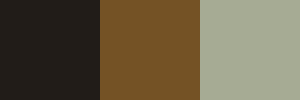

In [26]:
render_color_platte(main_color_goya)

In [27]:
# agrupo en una funció per a treuere el top 3 de colors d'un DataFrame

def color3_from_dataframe (column):
    lista_paleta = get_palette_list(column)
    main_colors = get_top3_colors(lista_paleta)
    return render_color_platte(main_colors)

def color3_codes (column):
    lista_paleta = get_palette_list(column)
    return get_top3_colors(lista_paleta)


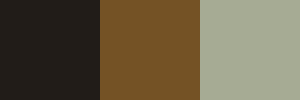

In [28]:
color3_from_dataframe(goya["img_name"])



In [29]:
color3_codes(goya["img_name"])

[((33, 28, 24), 48441), ((116, 82, 37), 8959), ((166, 171, 148), 1863)]

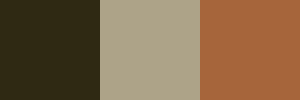

In [30]:
velaz = paintings[paintings['artist'].astype(str).str.contains('Velázquez', case=False)]
velaz

color3_from_dataframe(velaz["img_name"])

In [31]:
color3_codes(velaz["img_name"])

[((47, 41, 19), 59585), ((173, 163, 136), 4692), ((166, 101, 59), 3612)]

In [32]:
color3_codes(paintings["img_name"])

[((197, 192, 163), 42718), ((131, 43, 29), 24988), ((47, 18, 10), 2750)]

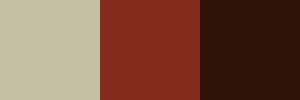

In [33]:
color3_from_dataframe(paintings["img_name"])

In [38]:
#get all color codes -> add them into a new column in the dataframe!
def get_all_color_codes (column):
    all_col = []
    for pic in column:
        try:
            path = f"images/prado_paintings/{pic}"
            col_list = extract_colors(path)
            all_col.append(col_list)
        except:
            all_col.append([])
            print(f"the {pic} is damaged")
            pass
    return all_col


In [39]:
#with this function I will get a list of all the color codes from the img_name column, if the img is damaged, the codes will be []

len(get_all_color_codes(paintings["img_name"]))


the 86d75c9b-af1c-4e52-86fe-9ee9f7987ae8_268.jpg is damaged
the e7573626-3a12-4acd-b7eb-1db4a6d9aa42_268.jpg is damaged
the 43500211-3ef1-4f38-bae6-d7ede0fe80f5_268.jpg is damaged
the 4230ce8a-ff28-41a7-b5c6-932b86b1a62c_268.jpg is damaged


3218